In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR  
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
dataset = pd.read_csv("Preprocessed Dataset.csv")
dataset.head()

,alarm_id,customer_id,hostname,fault_severity,device_contract_level,status,created_at,fault_description,file_name,impact,...,features,fingerprint,hw,last_reset,product_family,product_type,reset_reason,sw,sw_type_y,sw_version
0,24600766,Bg5Zru3Rw4tzK0,Device_63_115_116_140,Critical,2,Success,2023-10-13 01 00 10.000000,"Due to issues like memory fragmentation, somet...",116_FXS2311Q3UZ_Bg5Zru3Rw4tzK0_1697158810445_c...,Memory fragmentation leads crypto to fail and ...,...,NTPv4_IOS SNMP_Trap_memory Connection_and_Syst...,17_1 CAT9K_IOSXE SYSTEM IOS_XE 17_1_1 Cisco_Ca...,Cisco_Catalyst_9600_Series_Switches C9606R Cat...,2021_01_13T22:23:27,Cisco_Catalyst_9600_Series_Switches,Switches,PowerOn,17_1 CAT9K_IOSXE SYSTEM IOS_XE 17_1_1,IOS_XE,17_1_1
1,24600766,Bg5Zru3Rw4tzK0,Device_63_115_116_140,Critical,2,Success,2023-10-13 01 00 10.000000,"Due to issues like memory fragmentation, somet...",116_FXS2311Q3UZ_Bg5Zru3Rw4tzK0_1697158810445_c...,Memory fragmentation leads crypto to fail and ...,...,NTPv4_IOS Connection_and_System_Banners IKE_No...,16_12 CAT9K_IOSXE SYSTEM IOS_XE 16_12_4 Cataly...,Catalyst_9K_Series_Power_Supplies C9600_PWR_2K...,2020_10_13T14:21:48,Cisco_Catalyst_9600_Series_Switches,Switches,Critical_process_stack_mgr_fault_on_rp_0_0__rc...,16_12 CAT9K_IOSXE SYSTEM IOS_XE 16_12_4,IOS_XE,16_12_4
2,24600766,Bg5Zru3Rw4tzK0,Device_63_115_116_140,Critical,2,Success,2023-10-13 01 00 10.000000,"Due to issues like memory fragmentation, somet...",116_FXS2311Q3UZ_Bg5Zru3Rw4tzK0_1697158810445_c...,Memory fragmentation leads crypto to fail and ...,...,NTPv4_IOS SNMP_Trap_memory QoS_Infrastructure_...,17_3 CAT9K_IOSXE SYSTEM IOS_XE 17_3_4 Transcei...,Transceiver_Modules GLC_SX_MMD Transceiver_Mod...,2022_03_04T23:23:45,Cisco_Catalyst_9600_Series_Switches,Switches,ISSU,17_3 CAT9K_IOSXE SYSTEM IOS_XE 17_3_4,IOS_XE,17_3_4
3,24600766,Bg5Zru3Rw4tzK0,Device_63_115_116_140,Critical,2,Success,2023-10-13 01 00 10.000000,"Due to issues like memory fragmentation, somet...",116_FXS2311Q3UZ_Bg5Zru3Rw4tzK0_1697158810445_c...,Memory fragmentation leads crypto to fail and ...,...,NTPv4_IOS IOS_Spanning_Tree_Protocol_STP Conne...,16_12 CAT9K_IOSXE SYSTEM IOS_XE 16_12_4 Transc...,Transceiver_Modules SFP_10G_LR_S Catalyst_9K_S...,NaN,Cisco_Catalyst_9600_Series_Switches,Switches,NaN,16_12 CAT9K_IOSXE SYSTEM IOS_XE 16_12_4,IOS_XE,16_12_4
4,24600766,Bg5Zru3Rw4tzK0,Device_63_115_116_140,Critical,2,Success,2023-10-13 01 00 10.000000,"Due to issues like memory fragmentation, somet...",116_FXS2311Q3UZ_Bg5Zru3Rw4tzK0_1697158810445_c...,Memory fragmentation leads crypto to fail and ...,...,NTPv4_IOS SNMP_Trap_memory Connection_and_Syst...,17_3 CAT9K_IOSXE SYSTEM IOS_XE 17_3_3 Transcei...,Transceiver_Modules SFP_10G_LRM Transceiver_Mo...,2021_06_24T00:03:01,Cisco_Catalyst_9600_Series_Switches,Switches,Image_Install,17_3 CAT9K_IOSXE SYSTEM IOS_XE 17_3_3,IOS_XE,17_3_3


In [3]:
dataset.shape

(356, 42)

In [4]:
encoded_dataFrame = pd.DataFrame()
 
label_encoder = sklearn.preprocessing.LabelEncoder() 
for column in dataset.columns :
    if column != 'crashed':
        encoded_dataFrame[column] = label_encoder.fit_transform(dataset[column])

encoded_dataFrame['crashed'] = dataset['crashed']
encoded_dataFrame

,alarm_id,customer_id,hostname,fault_severity,device_contract_level,status,created_at,fault_description,file_name,impact,...,fingerprint,hw,last_reset,product_family,product_type,reset_reason,sw,sw_type_y,sw_version,crashed
0,0,0,2,0,0,0,0,0,0,1,...,77,73,21,1,0,35,18,0,17,0
1,0,0,2,0,0,0,0,0,0,1,...,23,47,14,1,0,11,6,0,6,1
2,0,0,2,0,0,0,0,0,0,1,...,110,90,88,1,0,31,23,0,22,0
3,0,0,2,0,0,0,0,0,0,1,...,30,109,102,1,0,38,6,0,6,0
4,0,0,2,0,0,0,0,0,0,1,...,91,105,36,1,0,32,22,0,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,5,0,0,0,0,0,5,1,5,0,...,3,54,7,0,0,35,1,0,1,0
352,5,0,0,0,0,0,5,1,5,0,...,12,1,102,0,0,35,5,0,5,0
353,5,0,0,0,0,0,5,1,5,0,...,24,70,37,0,0,32,6,0,6,0
354,5,0,0,0,0,0,5,1,5,0,...,48,25,1,0,0,35,13,0,12,0


In [5]:
correlation_dataFrame = encoded_dataFrame.corr()
correlation_dataFrame

,alarm_id,customer_id,hostname,fault_severity,device_contract_level,status,created_at,fault_description,file_name,impact,...,fingerprint,hw,last_reset,product_family,product_type,reset_reason,sw,sw_type_y,sw_version,crashed
alarm_id,1.000000,NaN,-0.484062,NaN,NaN,NaN,1.000000,2.271985e-01,1.000000,-0.270787,...,-1.207726e-01,-2.434602e-01,-2.399849e-02,-4.274306e-01,NaN,-1.742530e-01,-1.159337e-01,NaN,-1.243796e-01,2.329692e-01
customer_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hostname,-0.484062,NaN,1.000000,NaN,NaN,NaN,-0.484062,-4.693581e-01,-0.484062,0.559406,...,2.494983e-01,5.029524e-01,4.957730e-02,8.830079e-01,NaN,3.599807e-01,2.395017e-01,NaN,2.569497e-01,-4.812797e-01
fault_severity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
device_contract_level,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
created_at,1.000000,NaN,-0.484062,NaN,NaN,NaN,1.000000,2.271985e-01,1.000000,-0.270787,...,-1.207726e-01,-2.434602e-01,-2.399849e-02,-4.274306e-01,NaN,-1.742530e-01,-1.159337e-01,NaN,-1.243796e-01,2.329692e-01
fault_description,0.227198,NaN,-0.469358,NaN,NaN,NaN,0.227198,1.000000e+00,0.227198,0.469358,...,-6.897481e-17,-1.833387e-16,-9.067012e-17,-1.765949e-16,NaN,-1.619973e-16,-5.051180e-16,NaN,-2.702970e-16,8.081714e-17
file_name,1.000000,NaN,-0.484062,NaN,NaN,NaN,1.000000,2.271985e-01,1.000000,-0.270787,...,-1.207726e-01,-2.434602e-01,-2.399849e-02,-4.274306e-01,NaN,-1.742530e-01,-1.159337e-01,NaN,-1.243796e-01,2.329692e-01
impact,-0.270787,NaN,0.559406,NaN,NaN,NaN,-0.270787,4.693581e-01,-0.270787,1.000000,...,2.494983e-01,5.029524e-01,4.957730e-02,8.830079e-01,NaN,3.599807e-01,2.395017e-01,NaN,2.569497e-01,-4.812797e-01


In [6]:
correlation_dataFrame['crashed']

alarm_id                 2.329692e-01
customer_id                       NaN
hostname                -4.812797e-01
fault_severity                    NaN
device_contract_level             NaN
status                            NaN
created_at               2.329692e-01
fault_description        8.081714e-17
file_name                2.329692e-01
impact                  -4.812797e-01
mgmt_system_addr                  NaN
mgmt_system_id                    NaN
mgmt_system_type                  NaN
remediation             -4.812797e-01
syslog_msg              -4.608195e-01
tac_severity                      NaN
afm_cust_id_fk                    NaN
prod_obj_id_fk           5.450457e-01
managed_ne_id           -4.812797e-01
product_id              -5.450457e-01
sw_type_x                         NaN
serial_number           -4.812797e-01
cli_status                        NaN
solution_id                       NaN
usecase_id               5.450457e-01
signature_uuid           8.081714e-17
primekey    

In [7]:
crashed_correlated_dataFrame = pd.DataFrame(correlation_dataFrame['crashed'])
crashed_correlated_dataFrame.dropna(inplace = True)
crashed_correlated_dataFrame

,crashed
alarm_id,2.329692e-01
hostname,-4.812797e-01
created_at,2.329692e-01
fault_description,8.081714e-17
file_name,2.329692e-01
impact,-4.812797e-01
remediation,-4.812797e-01
syslog_msg,-4.608195e-01
prod_obj_id_fk,5.450457e-01
managed_ne_id,-4.812797e-01


In [8]:
crashed_correlated_dict = dict()
columns_to_keep = list()

for index in range(crashed_correlated_dataFrame.shape[0]):
    key = crashed_correlated_dataFrame.iloc[index].name
    columns_to_keep.append(key)
    if key != 'crashed':
        crashed_correlated_dict[crashed_correlated_dataFrame.iloc[index].name] = crashed_correlated_dataFrame['crashed'].iloc[index]
        
crashed_correlated_dict_in_descending_order = dict(sorted(crashed_correlated_dict.items(), key = operator.itemgetter(1), reverse = True))
crashed_correlated_dict_in_descending_order

{'prod_obj_id_fk': 0.5450457022868392,
 'usecase_id': 0.5450457022868392,
 'primekey': 0.23696007171161598,
 'i_d': 0.23696007171161598,
 'alarm_id': 0.23296923529592925,
 'created_at': 0.23296923529592925,
 'file_name': 0.23296923529592925,
 'device_id': 0.21221688798345903,
 'last_reset': 0.04321553545356994,
 'fault_description': 8.08171360645626e-17,
 'signature_uuid': 8.08171360645626e-17,
 'sw': -0.10233972115429586,
 'fingerprint': -0.10532355506208228,
 'sw_version': -0.11736502533065689,
 'device_type': -0.2584837753976487,
 'cpy_key': -0.34977829123034615,
 'hw': -0.3765010858031829,
 'features': -0.37722047651911417,
 'syslog_msg': -0.4608194644914447,
 'hostname': -0.48127966679325834,
 'remediation': -0.48127966679325834,
 'impact': -0.4812796667932585,
 'managed_ne_id': -0.4812796667932585,
 'serial_number': -0.4812796667932585,
 'product_id': -0.5450457022868391,
 'product_family': -0.5450457022868391,
 'reset_reason': -0.7984304207914686}

In [9]:
columns_to_keep.remove('primekey')
columns_to_keep.remove('i_d')
columns_to_keep.remove('created_at')
columns_to_keep.remove('file_name')
columns_to_keep.remove('signature_uuid')
columns_to_keep.remove('sw')
columns_to_keep.remove('hw')
columns_to_drop = dataset.columns.difference(columns_to_keep)
print("Columns to be dropped - {}".format(columns_to_drop))

Columns to be dropped - Index(['afm_cust_id_fk', 'cli_status', 'created_at', 'customer_id',
       'device_contract_level', 'fault_severity', 'file_name', 'hw', 'i_d',
       'mgmt_system_addr', 'mgmt_system_id', 'mgmt_system_type', 'primekey',
       'product_type', 'signature_uuid', 'solution_id', 'status', 'sw',
       'sw_type_x', 'sw_type_y', 'tac_severity'],
      dtype='object')


### Splitting of dataset into training and testing data

In [10]:
target_column = encoded_dataFrame['crashed']
feature_columns = encoded_dataFrame.drop(columns = columns_to_drop, axis = 1)
features_train, features_test, target_train, target_test = train_test_split(feature_columns, target_column, test_size = 0.4, random_state = 1)

In [11]:
mean_absolute_error_models_dict = dict()
mean_squared_error_models_dict = dict()
r2_score_models_dict = dict()

### SVR

In [12]:
SVR_model = SVR(kernel='linear') 
SVR_model.fit(features_train, target_train) 

target_SVR_predicted = SVR_model.predict(features_test)
target_SVR_predicted

array([ 6.48336281e-02, -1.83681101e-02,  3.14418324e-02,  3.34178134e-02,
        1.48119083e-02,  5.84054506e-02,  5.04485337e-02, -6.16068172e-02,
       -7.86749151e-02, -1.01657743e-03,  9.69210632e-01,  9.67836854e-01,
        8.99908930e-01,  7.28879908e-02,  6.97630557e-02,  5.54463745e-02,
        1.43941120e-02,  1.02332213e-02,  6.85724614e-02, -1.83893616e-02,
        5.54473886e-02,  9.77232577e-01, -2.18185516e-02,  6.23861136e-02,
        9.23646133e-02, -9.07007415e-03,  3.34167993e-02,  7.28869995e-02,
        7.80434590e-02,  2.75205950e-02, -1.85207806e-02,  9.54440245e-02,
        3.34657872e-03,  9.32392765e-03,  4.51765838e-02, -4.75618958e-02,
        9.00466961e-01,  4.37867530e-02, -5.73663639e-03,  4.58471198e-02,
        2.91693626e-02,  3.14428694e-02,  1.10427658e-02,  1.20031952e-03,
       -1.00009206e-01,  8.16140881e-02,  9.85023782e-01,  1.43941349e-02,
       -2.02661360e-02,  5.14676251e-03,  3.14428465e-02,  9.34080037e-02,
        5.54463516e-02, -

In [13]:
sklearn.preprocessing.minmax_scale(target_SVR_predicted, feature_range=(0, 1), axis=0, copy=False)

array([0.1413876 , 0.07002451, 0.11274707, 0.11444189, 0.0984834 ,
       0.13587408, 0.12904934, 0.03293817, 0.01829867, 0.08490712,
       0.9170822 , 0.91590389, 0.85764133, 0.14829592, 0.14561563,
       0.13333605, 0.09812505, 0.0945562 , 0.14459444, 0.07000628,
       0.13333692, 0.92396271, 0.06706503, 0.13928834, 0.16500125,
       0.07799954, 0.11444102, 0.14829507, 0.15271783, 0.10938378,
       0.06989356, 0.16764249, 0.08864945, 0.09377629, 0.12452753,
       0.04498466, 0.85811996, 0.12333545, 0.08085867, 0.12510265,
       0.11079795, 0.11274796, 0.09525056, 0.08680858, 0.        ,
       0.1557804 , 0.93064532, 0.09812507, 0.06839655, 0.09019349,
       0.11274794, 0.16589617, 0.13333603, 0.01735697, 0.90064638,
       0.17110612, 0.06689631, 0.94715122, 0.01829782, 0.0042248 ,
       0.9439493 , 0.14829505, 0.09470297, 0.09377542, 0.92396184,
       1.        , 0.06689629, 0.12510178, 0.15446859, 0.0091799 ,
       0.1577575 , 0.09323321, 0.01735612, 0.11444101, 0.17179

In [14]:
probability_SVR_list = list(map(lambda n: "%.1f" %(n*100), target_SVR_predicted))
probability_SVR_list

['14.1',
 '7.0',
 '11.3',
 '11.4',
 '9.8',
 '13.6',
 '12.9',
 '3.3',
 '1.8',
 '8.5',
 '91.7',
 '91.6',
 '85.8',
 '14.8',
 '14.6',
 '13.3',
 '9.8',
 '9.5',
 '14.5',
 '7.0',
 '13.3',
 '92.4',
 '6.7',
 '13.9',
 '16.5',
 '7.8',
 '11.4',
 '14.8',
 '15.3',
 '10.9',
 '7.0',
 '16.8',
 '8.9',
 '9.4',
 '12.5',
 '4.5',
 '85.8',
 '12.3',
 '8.1',
 '12.5',
 '11.1',
 '11.3',
 '9.5',
 '8.7',
 '0.0',
 '15.6',
 '93.1',
 '9.8',
 '6.8',
 '9.0',
 '11.3',
 '16.6',
 '13.3',
 '1.7',
 '90.1',
 '17.1',
 '6.7',
 '94.7',
 '1.8',
 '0.4',
 '94.4',
 '14.8',
 '9.5',
 '9.4',
 '92.4',
 '100.0',
 '6.7',
 '12.5',
 '15.4',
 '0.9',
 '15.8',
 '9.3',
 '1.7',
 '11.4',
 '17.2',
 '8.7',
 '14.1',
 '8.5',
 '89.5',
 '7.9',
 '12.5',
 '0.4',
 '11.3',
 '94.3',
 '92.5',
 '13.6',
 '15.3',
 '14.6',
 '14.7',
 '14.6',
 '12.3',
 '8.7',
 '8.7',
 '2.1',
 '11.1',
 '88.4',
 '8.1',
 '17.2',
 '7.0',
 '93.4',
 '2.1',
 '9.3',
 '88.4',
 '6.7',
 '1.1',
 '11.1',
 '8.1',
 '11.3',
 '6.8',
 '8.9',
 '2.1',
 '95.0',
 '9.8',
 '1.8',
 '11.1',
 '11.3',
 '14.

In [15]:
mean_absolute_error_models_dict['SVR'] = mean_absolute_error(target_test, target_SVR_predicted)
mean_squared_error_models_dict['SVR'] = mean_squared_error(target_test, target_SVR_predicted)
r2_score_models_dict['SVR'] = r2_score(target_test, target_SVR_predicted)

In [16]:
print("Mean Absolute Error: {}".format(mean_absolute_error_models_dict['SVR']))
print("Mean Squared Error: {}".format(mean_squared_error_models_dict['SVR']))
print("R-Square Error: {}".format(r2_score_models_dict['SVR']))

Mean Absolute Error: 0.10053132668151142
Mean Squared Error: 0.012093203768017624
R-Square Error: 0.9071022074184101


### Linear Regression

In [17]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(features_train, target_train)

target_lr_predicted = LinearRegression_model.predict(features_test) 
target_lr_predicted

array([ 7.87200957e-17, -8.02450198e-16,  2.15644802e-16, -1.37641047e-15,
       -2.67972803e-16,  1.26647508e-15,  9.21090975e-16, -4.73074714e-16,
       -6.48988227e-16, -4.85879740e-16,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  3.38507829e-16,  6.88258035e-16, -1.43724179e-16,
        3.90352534e-17,  3.77778824e-16,  5.27726490e-16, -5.93581901e-16,
       -3.59223895e-16,  1.00000000e+00,  6.50719888e-16,  8.80678265e-17,
        1.89074520e-15,  4.16854496e-16, -1.16091076e-15, -6.79412493e-18,
        1.66353904e-16, -5.91782763e-16,  1.69691924e-15,  7.22559924e-16,
       -1.43424443e-16,  1.49538274e-15, -6.60405921e-16,  1.27472548e-16,
        1.00000000e+00,  1.94688994e-16, -5.61912310e-16,  3.81058037e-16,
       -1.51065276e-15, -5.60656584e-16, -1.92298791e-16,  4.87305422e-16,
       -1.08308202e-15,  3.71061890e-16,  1.00000000e+00, -5.21766416e-16,
       -2.56280065e-16, -2.01962188e-15,  1.45086224e-19,  2.08941043e-15,
        4.17077491e-16, -

In [18]:
sklearn.preprocessing.minmax_scale(target_lr_predicted, feature_range=(0, 1), axis=0, copy=False)

array([2.09834197e-15, 1.21717168e-15, 2.23526668e-15, 6.43211404e-16,
       1.75164907e-15, 3.28609696e-15, 2.94071285e-15, 1.54654716e-15,
       1.37063365e-15, 1.53374214e-15, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 2.35812970e-15, 2.70787991e-15, 1.87589770e-15,
       2.05865713e-15, 2.39740070e-15, 2.54734837e-15, 1.42603997e-15,
       1.66039798e-15, 1.00000000e+00, 2.67034176e-15, 2.10768970e-15,
       3.91036708e-15, 2.43647637e-15, 8.58711120e-16, 2.01282775e-15,
       2.18597578e-15, 1.42783911e-15, 3.71654111e-15, 2.74218180e-15,
       1.87619743e-15, 3.51500461e-15, 1.35921596e-15, 2.14709442e-15,
       1.00000000e+00, 2.21431087e-15, 1.45770957e-15, 2.40067991e-15,
       5.08969116e-16, 1.45896529e-15, 1.82732308e-15, 2.50692730e-15,
       9.36539860e-16, 2.39068377e-15, 1.00000000e+00, 1.49785546e-15,
       1.76334181e-15, 0.00000000e+00, 2.01976696e-15, 4.10903231e-15,
       2.43669937e-15, 1.21272950e-15, 1.00000000e+00, 9.62717665e-17,
      

In [19]:
probability_lr_list = list(map(lambda n: "%.1f" %(n*100), target_lr_predicted))
probability_lr_list

['0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '100.0',
 '100.0',
 '100.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '100.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '100.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '100.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '100.0',
 '0.0',
 '0.0',
 '100.0',
 '0.0',
 '0.0',
 '100.0',
 '0.0',
 '0.0',
 '0.0',
 '100.0',
 '100.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '100.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '100.0',
 '100.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '100.0',
 '0.0',
 '0.0',
 '0.0',
 '100.0',
 '0.0',
 '0.0',
 '100.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '100.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '0.0',
 '10

In [20]:
mean_absolute_error_models_dict['Linear Regression'] = mean_absolute_error(target_test, target_lr_predicted)
mean_squared_error_models_dict['Linear Regression'] = mean_squared_error(target_test, target_lr_predicted)
r2_score_models_dict['Linear Regression'] = r2_score(target_test, target_lr_predicted)

In [21]:
print("Mean Absolute Error: {}".format(mean_absolute_error_models_dict['Linear Regression']))
print("Mean Squared Error: {}".format(mean_squared_error_models_dict['Linear Regression']))
print("R-Square Error: {}".format(r2_score_models_dict['Linear Regression']))

Mean Absolute Error: 1.8638091688450015e-15
Mean Squared Error: 4.470534335371452e-30
R-Square Error: 1.0


### Gradient Boosting Regressor

In [22]:
GradientBoostingRegressor_model = GradientBoostingRegressor(random_state = 1)
GradientBoostingRegressor_model.fit(features_train, target_train)

target_gbr_predicted = GradientBoostingRegressor_model.predict(features_test)
target_gbr_predicted

array([5.73626455e-06, 5.73626455e-06, 5.73626455e-06, 5.73626455e-06,
       5.73626455e-06, 5.73626455e-06, 5.73626455e-06, 5.73626455e-06,
       5.73626455e-06, 5.73626455e-06, 9.99979175e-01, 9.99979175e-01,
       9.99979175e-01, 5.73626455e-06, 5.73626455e-06, 5.73626455e-06,
       5.73626455e-06, 5.73626455e-06, 5.73626455e-06, 5.73626455e-06,
       5.73626455e-06, 9.99979175e-01, 5.73626455e-06, 5.73626455e-06,
       5.73626455e-06, 5.73626455e-06, 5.73626455e-06, 5.73626455e-06,
       5.73626455e-06, 5.73626455e-06, 5.73626455e-06, 5.73626455e-06,
       5.73626455e-06, 5.73626455e-06, 5.73626455e-06, 5.73626455e-06,
       9.99979175e-01, 5.73626455e-06, 5.73626455e-06, 5.73626455e-06,
       5.73626455e-06, 5.73626455e-06, 5.73626455e-06, 5.73626455e-06,
       5.73626455e-06, 5.73626455e-06, 9.99979175e-01, 5.73626455e-06,
       5.73626455e-06, 5.73626455e-06, 5.73626455e-06, 5.73626455e-06,
       5.73626455e-06, 5.73626455e-06, 9.99979175e-01, 5.73626455e-06,
      

In [23]:
mean_absolute_error_models_dict['Gradient Boosting Regression'] = mean_absolute_error(target_test, target_gbr_predicted)
mean_squared_error_models_dict['Gradient Boosting Regression'] = mean_squared_error(target_test, target_gbr_predicted)
r2_score_models_dict['Gradient Boosting Regression'] = r2_score(target_test, target_gbr_predicted)

In [24]:
print("Mean Absolute Error: {}".format(mean_absolute_error_models_dict['Gradient Boosting Regression']))
print("Mean Squared Error: {}".format(mean_squared_error_models_dict['Gradient Boosting Regression']))
print("R-Square Error: {}".format(r2_score_models_dict['Gradient Boosting Regression']))

Mean Absolute Error: 8.057629131662984e-06
Mean Squared Error: 9.456342162739988e-11
R-Square Error: 0.999999999273581


### RandomForest Regression

In [25]:
RandomForestRegressor_model = RandomForestRegressor(random_state = 1)
RandomForestRegressor_model.fit(features_train, target_train)

target_rbr_predicted = RandomForestRegressor_model.predict(features_test)
target_rbr_predicted

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
       1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
       0.03, 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 1.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
       1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       1.  , 1.  , 0.  , 0.  , 0.03, 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ])

In [26]:
mean_absolute_error_models_dict['Random Forest Regression'] = mean_absolute_error(target_test, target_rbr_predicted)
mean_squared_error_models_dict['Random Forest Regression'] = mean_squared_error(target_test, target_rbr_predicted)
r2_score_models_dict['Random Forest Regression'] = r2_score(target_test, target_rbr_predicted)

In [27]:
print("Mean Absolute Error: {}".format(mean_absolute_error_models_dict['Random Forest Regression']))
print("Mean Squared Error: {}".format(mean_squared_error_models_dict['Random Forest Regression']))
print("R-Square Error: {}".format(r2_score_models_dict['Random Forest Regression']))

Mean Absolute Error: 0.0004195804195804196
Mean Squared Error: 1.2587412587412587e-05
R-Square Error: 0.999903305785124


### Voting Regressor (GradientBoostRegressor, RandomForestRegressor, LinearRegression)¶ 

In [28]:
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
VotingRegressor_model = VotingRegressor(estimators=[('gbr', reg1), ('rfr', reg2), ('lr', reg3)])
VotingRegressor_model.fit(features_train, target_train)

VotingRegressor(estimators=[('gbr', GradientBoostingRegressor(random_state=1)),
                            ('rfr', RandomForestRegressor(random_state=1)),
                            ('lr', LinearRegression())])

In [29]:
target_vreg_predicted = VotingRegressor_model.predict(features_test)
target_vreg_predicted

array([1.91208818e-06, 1.91208818e-06, 1.91208818e-06, 1.91208818e-06,
       1.91208818e-06, 1.91208818e-06, 1.91208818e-06, 1.91208818e-06,
       1.91208818e-06, 1.91208818e-06, 9.99993058e-01, 9.99993058e-01,
       9.99993058e-01, 1.91208818e-06, 1.91208818e-06, 1.91208818e-06,
       1.91208818e-06, 1.91208818e-06, 1.91208818e-06, 1.91208818e-06,
       1.91208818e-06, 9.99993058e-01, 1.91208818e-06, 1.91208818e-06,
       1.91208818e-06, 1.91208818e-06, 1.91208818e-06, 1.91208818e-06,
       1.91208818e-06, 1.91208818e-06, 1.91208818e-06, 1.91208818e-06,
       1.91208818e-06, 1.91208818e-06, 1.91208818e-06, 1.91208818e-06,
       9.99993058e-01, 1.91208818e-06, 1.91208818e-06, 1.91208818e-06,
       1.91208818e-06, 1.91208818e-06, 1.91208818e-06, 1.91208818e-06,
       1.91208818e-06, 1.91208818e-06, 9.99993058e-01, 1.91208818e-06,
       1.91208818e-06, 1.91208818e-06, 1.91208818e-06, 1.91208818e-06,
       1.91208818e-06, 1.91208818e-06, 9.99993058e-01, 1.00019121e-02,
      

In [30]:
mean_absolute_error_models_dict['Voting Regressor(GBR, RBF, LR)'] = mean_absolute_error(target_test, target_vreg_predicted)
mean_squared_error_models_dict['Voting Regressor(GBR, RBF, LR)'] = mean_squared_error(target_test, target_vreg_predicted)
r2_score_models_dict['Voting Regressor(GBR, RBF, LR)'] = r2_score(target_test, target_vreg_predicted)

In [31]:
print("Mean Absolute Error: {}".format(mean_absolute_error_models_dict['Voting Regressor(GBR, RBF, LR)']))
print("Mean Squared Error: {}".format(mean_squared_error_models_dict['Voting Regressor(GBR, RBF, LR)']))
print("R-Square Error: {}".format(r2_score_models_dict['Voting Regressor(GBR, RBF, LR)']))

Mean Absolute Error: 0.00014254601623739618
Mean Squared Error: 1.3991467554894446e-06
R-Square Error: 0.9999892520090147


### Voting Regressor (GradientBoostRegressor, RandomForestRegressor, LinearRegression, SVR)

In [32]:
reg1 = GradientBoostingRegressor(random_state = 1)
reg2 = RandomForestRegressor(random_state = 1)
reg3 = LinearRegression()
reg4 = SVR(kernel = 'linear')
ereg = VotingRegressor(estimators=[('gbr', reg1), ('rfr', reg2), ('lr', reg3), ('svr', reg4)])
ereg.fit(features_train, target_train)

VotingRegressor(estimators=[('gbr', GradientBoostingRegressor(random_state=1)),
                            ('rfr', RandomForestRegressor(random_state=1)),
                            ('lr', LinearRegression()),
                            ('svr', SVR(kernel='linear'))])

In [33]:
target_ereg_predicted = ereg.predict(features_test)
target_ereg_predicted

array([ 1.62098411e-02, -4.59059345e-03,  7.86189216e-03,  8.35588742e-03,
        3.70441114e-03,  1.46027967e-02,  1.26135675e-02, -1.54002702e-02,
       -1.96672947e-02, -2.52710290e-04,  9.92297452e-01,  9.91954007e-01,
        9.74972026e-01,  1.82234318e-02,  1.74421980e-02,  1.38630277e-02,
        3.59996207e-03,  2.55973939e-03,  1.71445494e-02, -4.59590632e-03,
        1.38632812e-02,  9.94302938e-01, -5.45320384e-03,  1.55979625e-02,
        2.30925874e-02, -2.26608447e-03,  8.35563388e-03,  1.82231839e-02,
        1.95122988e-02,  6.88158281e-03, -4.62876108e-03,  2.38624402e-02,
        8.38078746e-04,  2.33241598e-03,  1.12955800e-02, -1.18890399e-02,
        9.75111534e-01,  1.09481223e-02, -1.43272503e-03,  1.14632140e-02,
        7.29377471e-03,  7.86215141e-03,  2.76212551e-03,  3.01513947e-04,
       -2.50008674e-02,  2.04049561e-02,  9.96250739e-01,  3.59996778e-03,
       -5.06509994e-03,  1.28812469e-03,  7.86214569e-03,  2.33534350e-02,
        1.38630220e-02, -

In [34]:
sklearn.preprocessing.minmax_scale(target_ereg_predicted, feature_range=(0, 1), axis=0, copy=False)

array([0.03956988, 0.01959763, 0.03155431, 0.03202863, 0.02756236,
       0.03802682, 0.03611679, 0.00921834, 0.00512121, 0.02376279,
       0.97679395, 0.97646418, 0.96015835, 0.0415033 , 0.04075317,
       0.0373165 , 0.02746207, 0.02646326, 0.04046737, 0.01959252,
       0.03731675, 0.97871959, 0.01876936, 0.03898236, 0.04617858,
       0.02182958, 0.03202839, 0.04150306, 0.04274085, 0.03061303,
       0.01956098, 0.04691778, 0.02481015, 0.02624499, 0.03485128,
       0.01258977, 0.9602923 , 0.03451766, 0.02262976, 0.03501224,
       0.03100881, 0.03155456, 0.02665759, 0.02429495, 0.        ,
       0.04359796, 0.98058984, 0.02746208, 0.01914201, 0.02524228,
       0.03155455, 0.04642905, 0.0373165 , 0.00485766, 0.97219409,
       0.05508852, 0.01872214, 0.98520931, 0.00512098, 0.00118239,
       0.9843132 , 0.04150305, 0.02650434, 0.02624475, 0.97871935,
       1.        , 0.01872214, 0.035012  , 0.04323083, 0.00256916,
       0.04415129, 0.026093  , 0.00485742, 0.03202839, 0.04807

In [35]:
mean_absolute_error_models_dict['Voting Regressor(GBR, RBF, LR, SVR)'] = mean_absolute_error(target_test, target_ereg_predicted)
mean_squared_error_models_dict['Voting Regressor(GBR, RBF, LR, SVR)'] = mean_squared_error(target_test, target_ereg_predicted)
r2_score_models_dict['Voting Regressor(GBR, RBF, LR, SVR)'] = r2_score(target_test, target_ereg_predicted)

In [36]:
print("Mean Absolute Error: {}".format(mean_absolute_error_models_dict['Voting Regressor(GBR, RBF, LR, SVR)']))
print("Mean Squared Error: {}".format(mean_squared_error_models_dict['Voting Regressor(GBR, RBF, LR, SVR)']))
print("R-Square Error: {}".format(r2_score_models_dict['Voting Regressor(GBR, RBF, LR, SVR)']))

Mean Absolute Error: 0.028236229310321524
Mean Squared Error: 0.0009575856536442203
R-Square Error: 0.9926440011151876


### Model Comparison using Quality Metrics

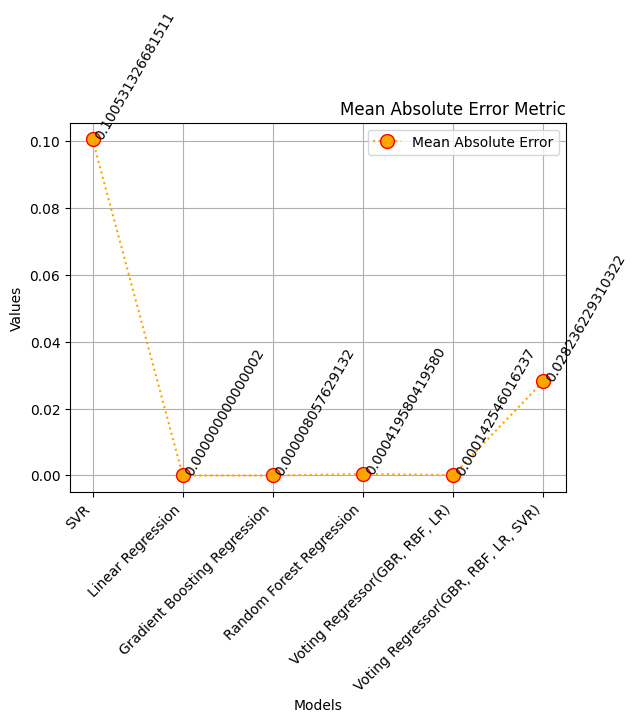

In [37]:
x = mean_absolute_error_models_dict.keys()
y = mean_absolute_error_models_dict.values()
fig, ax = plt.subplots()

ax.plot(x, y, marker = 'o', ms = 10, mec = 'r', color = 'orange', label = 'Mean Absolute Error', linestyle = ':')
for i, (xi, yi) in enumerate(zip(x, y)):
    ax.annotate('{:.15f}'.format(yi), (xi, yi), horizontalalignment='left', verticalalignment='baseline', rotation=60)
ax.legend()
ax.grid()
plt.title('Mean Absolute Error Metric', loc='right')
plt.xlabel('Models')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')
plt.show()

fig.savefig('Mean Absolute Error Metric.png', dpi = 300)

In [38]:
print("Mean Absolute Error of all models")
mean_absolute_error_models_dict

Mean Absolute Error of all models


{'SVR': 0.10053132668151142,
 'Linear Regression': 1.8638091688450015e-15,
 'Gradient Boosting Regression': 8.057629131662984e-06,
 'Random Forest Regression': 0.0004195804195804196,
 'Voting Regressor(GBR, RBF, LR)': 0.00014254601623739618,
 'Voting Regressor(GBR, RBF, LR, SVR)': 0.028236229310321524}

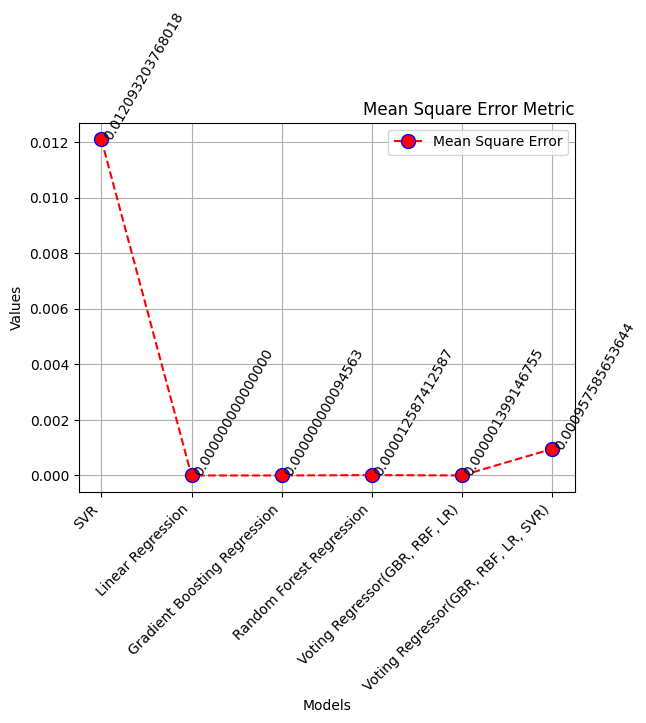

In [39]:
x = mean_squared_error_models_dict.keys()
y = mean_squared_error_models_dict.values()
fig, ax = plt.subplots()

ax.plot(x, y, marker = 'o', ms = 10, mec = 'b', color = 'r', label = 'Mean Square Error', linestyle = '--')
for i, (xi, yi) in enumerate(zip(x, y)):
    ax.annotate('{:.15f}'.format(yi), (xi, yi), horizontalalignment='left', verticalalignment='baseline', rotation=60)
ax.legend()
ax.grid()
plt.title('Mean Square Error Metric', loc='right')
plt.xlabel('Models')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')
plt.show()

fig.savefig('Mean Square Error Metric.png', dpi = 300)

In [40]:
print("Mean Squared Error of all models")
mean_squared_error_models_dict

Mean Squared Error of all models


{'SVR': 0.012093203768017624,
 'Linear Regression': 4.470534335371452e-30,
 'Gradient Boosting Regression': 9.456342162739988e-11,
 'Random Forest Regression': 1.2587412587412587e-05,
 'Voting Regressor(GBR, RBF, LR)': 1.3991467554894446e-06,
 'Voting Regressor(GBR, RBF, LR, SVR)': 0.0009575856536442203}

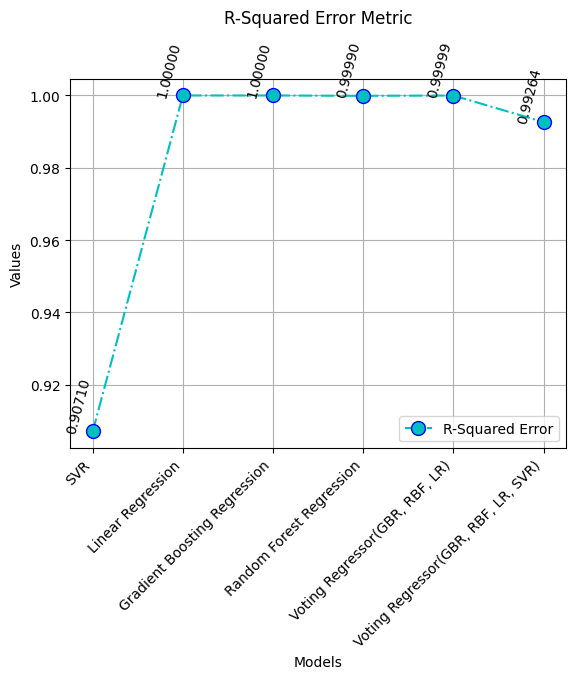

In [41]:
x = r2_score_models_dict.keys()
y = r2_score_models_dict.values()
fig, ax = plt.subplots()

ax.plot(x, y, marker = 'o', ms = 10, mec = 'b', color = 'c', label = 'R-Squared Error', linestyle = '-.')
for i, (xi, yi) in enumerate(zip(x, y)):
    ax.annotate('{:.5f}'.format(yi), (xi, yi), ha='right', va='baseline', rotation=75)
ax.legend()
ax.grid()
plt.legend()
plt.xlabel('Models')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')
plt.title('R-Squared Error Metric', loc='center', pad=40)
plt.show()

fig.savefig('R-Square Error Metric.png', dpi = 300)

In [42]:
print("R-Squared Error of all models")
r2_score_models_dict

R-Squared Error of all models


{'SVR': 0.9071022074184101,
 'Linear Regression': 1.0,
 'Gradient Boosting Regression': 0.999999999273581,
 'Random Forest Regression': 0.999903305785124,
 'Voting Regressor(GBR, RBF, LR)': 0.9999892520090147,
 'Voting Regressor(GBR, RBF, LR, SVR)': 0.9926440011151876}

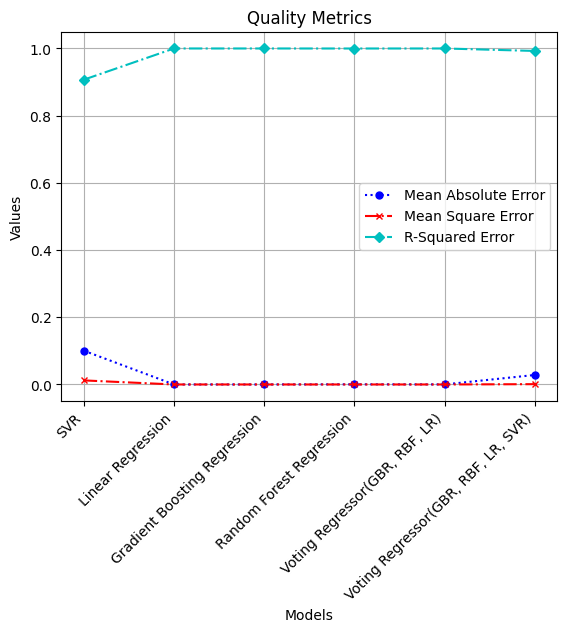

In [43]:
x = r2_score_models_dict.keys()
y = r2_score_models_dict.values()
fig, ax = plt.subplots()

ax.plot(mean_absolute_error_models_dict.keys(), mean_absolute_error_models_dict.values(), marker = 'o', ms = 5, color = 'b', label = 'Mean Absolute Error', linestyle = ':')
ax.plot(mean_squared_error_models_dict.keys(), mean_squared_error_models_dict.values(), marker = 'x', ms = 5, color = 'r', label = 'Mean Square Error', linestyle = '-.')
ax.plot(r2_score_models_dict.keys(), r2_score_models_dict.values(), marker = 'D', ms = 5, color = 'c', label = 'R-Squared Error', linestyle = '-.')
ax.legend()
ax.grid()
plt.legend()
plt.xlabel('Models')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')
plt.title('Quality Metrics')
plt.show()

fig.savefig('Quality Metrics.png', dpi = 300)